<a href="https://colab.research.google.com/github/bowserd1/California-Housing-Project/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
X_train=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/X_train.csv')
X_test=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/X_test.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/y_train.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/y_test.csv')
#y_train.set_index('Unnamed: 0',inplace = True)
#y_test.set_index('Unnamed: 0',inplace = True)

I start by reading in the training and test sets from the preprocessing stage.

In [4]:
y_train.head()

,MedHouseVal
0,1.854
1,3.288
2,3.674
3,2.374
4,1.609


In [5]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_per_room,occupancy_per_room,occupancy_per_bedroom,Miles_to_City,pop_april_1990,Pop_To_Miles_Ratio,coast_min,City_Income,Nearest_City_San Diego,Nearest_City_San Francisco,Nearest_City_San Jose
0,0.471261,0.902862,0.316155,0.523461,-0.720824,0.332506,-0.792882,0.822794,-0.287437,-0.094128,0.120241,-0.408689,1.013589,-0.046786,-0.581934,-0.636163,0,0,0
1,1.163184,0.738381,1.067907,-0.479656,-0.746130,-0.772542,0.929982,-1.409964,-1.063051,-1.005678,-0.654732,-0.443049,-1.046822,-0.435109,-0.824977,-0.184613,0,1,0
2,0.996647,-0.824194,0.881080,-0.084366,-0.911006,-1.061115,-0.941653,0.939242,-0.850350,-1.105722,-1.055311,0.166915,1.013589,-0.315622,-0.178568,-0.636163,0,0,0
3,-1.065061,0.738381,-1.604511,-0.600855,-0.473127,1.307354,-0.730494,0.630403,1.681586,2.673750,1.566685,-0.810112,1.013589,2.103432,-0.540689,-0.636163,0,0,0
4,0.370781,-1.317639,0.734543,0.172720,-0.404110,-0.170078,1.697832,-1.045432,-0.687727,-0.573479,-0.247765,1.591420,-1.046822,-0.526104,1.812181,-0.184613,0,1,0


In [6]:
models = {"Linear Regression": LinearRegression(), "Ridge": linear_model.Ridge(alpha=0.1), "Lasso": linear_model.Lasso(alpha=0.1)}
results = []

First, I'll make three different regression models and see how each of these perform.

In [7]:
for model in models.values():
  kf = KFold(n_splits=4, random_state=47, shuffle=True)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
  results.append(cv_scores)


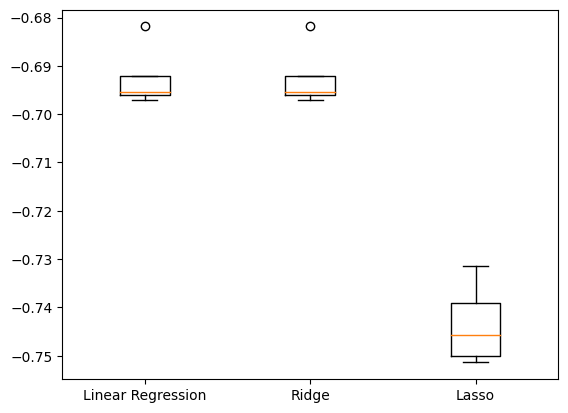

In [8]:
plt.boxplot(results, labels=models.keys());

The first models that I created are a Linear Regression, a Ridge Regression and a Lasso Regression. We can see here that the Linear and Ridge regressions are essentially identical, while the Lasso regression's scores are lagging significantly. These models are being evaluated by the negative mean root error, so the closer to 0, the better.

In [9]:
y_train.head()

,MedHouseVal
0,1.854
1,3.288
2,3.674
3,2.374
4,1.609


In [10]:
pipe = make_pipeline(SelectKBest(score_func=f_regression), LinearRegression())

Next, I am creating a pipeline that will evaluate the best number of features to use in the regression.

In [11]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f53499751f0>)),
                ('linearregression', LinearRegression())])

In [12]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [13]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [14]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [15]:
lr_grid_cv.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f53499751f0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [16]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [17]:
print(lr_grid_cv.best_params_)

{'selectkbest__k': 18}


After doing grid search to calculate the best number of features to use, we find that 18 are best to use in the linear regression.

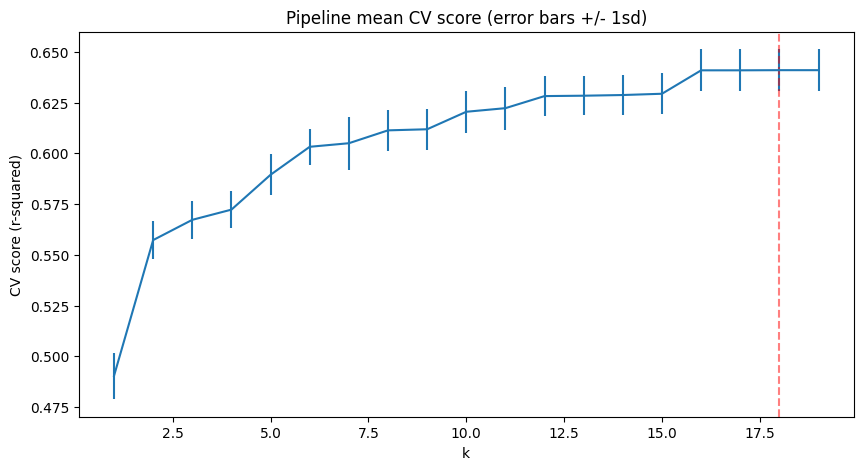

In [18]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

After graphing the R squared score, we can see that 16-19 features provide essentially the same score. our initial model used 19 features, so we will leave that model as it is and try some other models.

In [19]:
rf_pipe = make_pipeline(RandomForestRegressor(random_state=47, n_jobs=-1))

In [ ]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'randomforestregressor__n_estimators': n_est}

In [ ]:
rf_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomforestregressor', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [ ]:
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
rf_grid_cv.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000]})

In [ ]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000}

In [21]:
from sklearn.model_selection import cross_validate

In [22]:
rf_params = {'n_estimators': 1000}
rf_reg = RandomForestRegressor(**rf_params)

rf_cv_results = cross_validate(rf_reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [23]:
print('RMSE scores:', -rf_cv_results['test_score'])
print('Average RMSE:', -rf_cv_results['test_score'].mean())

RMSE scores: [0.58677647 0.58676367 0.59279706 0.5900872  0.58905277]
Average RMSE: 0.5890954345638872


The next model is a Random Forest regressor. Here, I used grid search and cross-validation to find the best hyperparameter for the number of estimators. The best scores are significantly better than the regression models with the average rmse at about .59.

The last model we will try is going to the XG Boost to see if boosting our trees works better than the bagging that we did with random forest.

In [24]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    "objective":['reg:squarederror']
}

I'll start by creating a grid of parameters to grid search over.

In [ ]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=4, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'objective': 'reg:squarederror'}
0.7563367488323011


In [25]:
xgb_best_params = {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'objective': 'reg:squarederror'}
xgb_reg = XGBRegressor(**xgb_best_params)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

After finding our best parameters and fitting them to our training data, we are ready to test this model on the test data we've been holding back. We can see that the root mean squared error is .57. This RMSE is a bit better than the Random Forest Model,so I will use this for my final model.

In [26]:
y_pred = xgb_reg.predict(X_test)

In [27]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean squared error:", mse)

Mean squared error: 0.5670171369231816


In [32]:
importances = xgb_reg.feature_importances_

indices = np.argsort(importances)[::-1]

print('Features:')
for i in top_indices:
    print(X_test.columns[i], importances[i])

Features:
MedInc 0.33502513
coast_min 0.17378823
AveOccup 0.07859848
Nearest_City_San Diego 0.0631688
Longitude 0.05872638
Pop_To_Miles_Ratio 0.040919065
occupancy_per_bedroom 0.04044308
Latitude 0.034849625
pop_april_1990 0.032174002
Miles_to_City 0.02702885
HouseAge 0.026677748
occupancy_per_room 0.023359757
City_Income 0.022225773
bedrooms_per_room 0.0129373465
AveRooms 0.011597193
Population 0.010267908
AveBedrms 0.008212635
Nearest_City_San Francisco 0.0
Nearest_City_San Jose 0.0


Finally, I checked to see what the most important features were in this model. We can see that median income is by far the most important feature, while the added feature coast_min which measures the distance to the Pacific coast is the second most important feature.

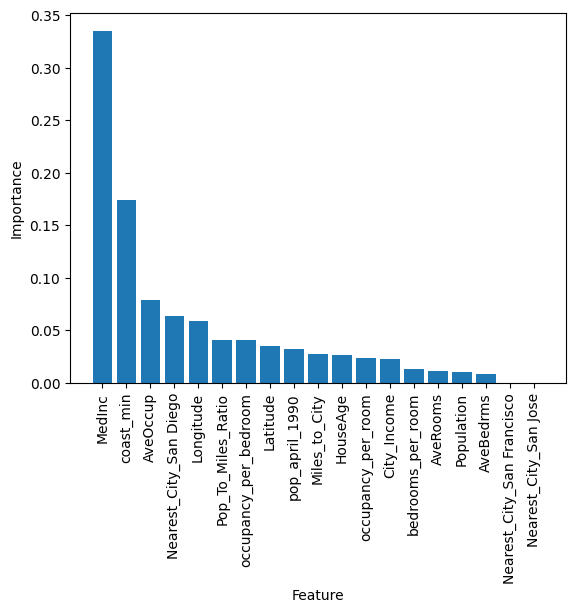

In [33]:
plt.bar(range(len(indices)), importances[top_indices])
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Here, I graphed the features and we can see the relative importance of each feature.